# Homework 2 - Steam Reviews 2021

### Libraries

First let's import some useful libraries

In [99]:
import pandas as pd
import numpy as np
from functions import *
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

import datetime as dt
import time

from scipy.stats import pearsonr, mannwhitneyu

And load our dataset

In [2]:
dataset = load_csv()

## [RQ1] Exploratory Data Analysis

Let's first review the file.
Our dataset is a collection of over 21 milion reviews of around 300 different games on the gaming platform Steam.

In [103]:
dataset

,app_name,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,steam_purchase,received_for_free,author.steamid
0,The Witcher 3: Wild Hunt,schinese,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,0.000000,True,False,76561199095369542
1,The Witcher 3: Wild Hunt,schinese,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,0,0.000000,True,False,76561198949504115
2,The Witcher 3: Wild Hunt,schinese,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,0,0.000000,True,False,76561199090098988
3,The Witcher 3: Wild Hunt,english,2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,0,0.000000,True,False,76561199054755373
4,The Witcher 3: Wild Hunt,schinese,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,0,0.000000,True,False,76561199028326951
...,...,...,...,...,...,...,...,...,...,...,...
21747366,Half-Life: Alyx,english,2020-03-23 18:05:04,2020-03-23 18:05:04,True,0,0,0.000000,True,False,76561197967033932
21747367,Half-Life: Alyx,english,2020-03-23 18:04:53,2020-03-23 18:04:53,True,0,0,0.000000,False,False,76561198046495482
21747368,Half-Life: Alyx,english,2020-03-23 18:04:33,2020-03-23 18:04:33,True,0,0,0.474138,True,False,76561198176379749
21747369,Half-Life: Alyx,english,2020-03-23 18:03:51,2020-04-08 21:47:02,True,0,0,0.386022,True,False,76561198041763187


In [4]:
dataset['app_name'].nunique()

315

We have **315 different games** being reviewed in our dataset.

The original dataset had over 20 columns of values, but we didn't need to work with all of them, so we took only the following columns to make the loading process faster:

In [104]:
print(list(dataset.columns))

['app_name', 'language', 'timestamp_created', 'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny', 'weighted_vote_score', 'steam_purchase', 'received_for_free', 'author.steamid']


We can find information about the review, the language it was written in, the time it was created (and when it was updated), the votes it received and information about the authors.

Before going in a more detailed analysis, let's begin by doing an exploratory data analysis with our dataset.
The first thing we did is analyze the correlation between various entries of the dataset. This is the *correlation table*:

In [105]:
dataset.corr()

,recommended,votes_helpful,votes_funny,weighted_vote_score,steam_purchase,received_for_free,author.steamid
recommended,1.000000,0.000115,-0.001702,-0.183002,-0.000171,0.007285,0.049478
votes_helpful,0.000115,1.000000,-0.000002,0.000137,0.000164,-0.000055,-0.000114
votes_funny,-0.001702,-0.000002,1.000000,0.007252,-0.000369,0.000468,-0.002710
weighted_vote_score,-0.183002,0.000137,0.007252,1.000000,-0.043215,0.008400,-0.155213
steam_purchase,-0.000171,0.000164,-0.000369,-0.043215,1.000000,-0.128136,0.100307
received_for_free,0.007285,-0.000055,0.000468,0.008400,-0.128136,1.000000,0.067089
author.steamid,0.049478,-0.000114,-0.002710,-0.155213,0.100307,0.067089,1.000000


There is no clear correlation between the values. The only one worth noticing is the correlation between the *weighted vote score* and the *recommended* value. We did a scatter plot of the two variables:

<function matplotlib.pyplot.show(close=None, block=None)>

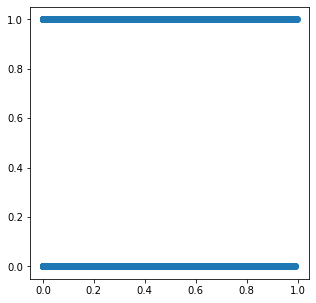

In [108]:
plt.figure(figsize = (5,5))
plt.scatter(x = dataset['weighted_vote_score'], y = dataset['recommended'])
plt.show

Unfortunately there is now true correlation between the variables. The value we obtained was due to the range the variables assume. In fact the *recommended* column only takes value of 0 and 1 while the *weighted_vote_score takes* values in [0,1]

Last thing we did was using the **Pandas** built-in function *describe* to gather some information about the distribution of the variables. Here are the results:

In [109]:
dataset.describe()

,votes_helpful,votes_funny,weighted_vote_score,author.steamid
count,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07
mean,4.044689e+05,1.267917e+05,1.654424e-01,7.656120e+16
std,1.333741e+09,2.333553e+07,2.434006e-01,3.179438e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16
25%,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16
50%,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16
75%,1.000000e+00,0.000000e+00,4.827586e-01,7.656120e+16
max,4.398047e+12,4.294967e+09,9.959868e-01,7.656120e+16


## [RQ2] Information about the games

First of all, we want to analyze which games are the most reviewed and which games were the most recommended.We used the **Pandas** built-in function *value_counts* to do a bar plot of the 10 most reviewed games, in descending order.
These are the results:

<AxesSubplot:title={'center':'Reviews amount for each App'}, xlabel='Application name', ylabel='Number of Reviews'>

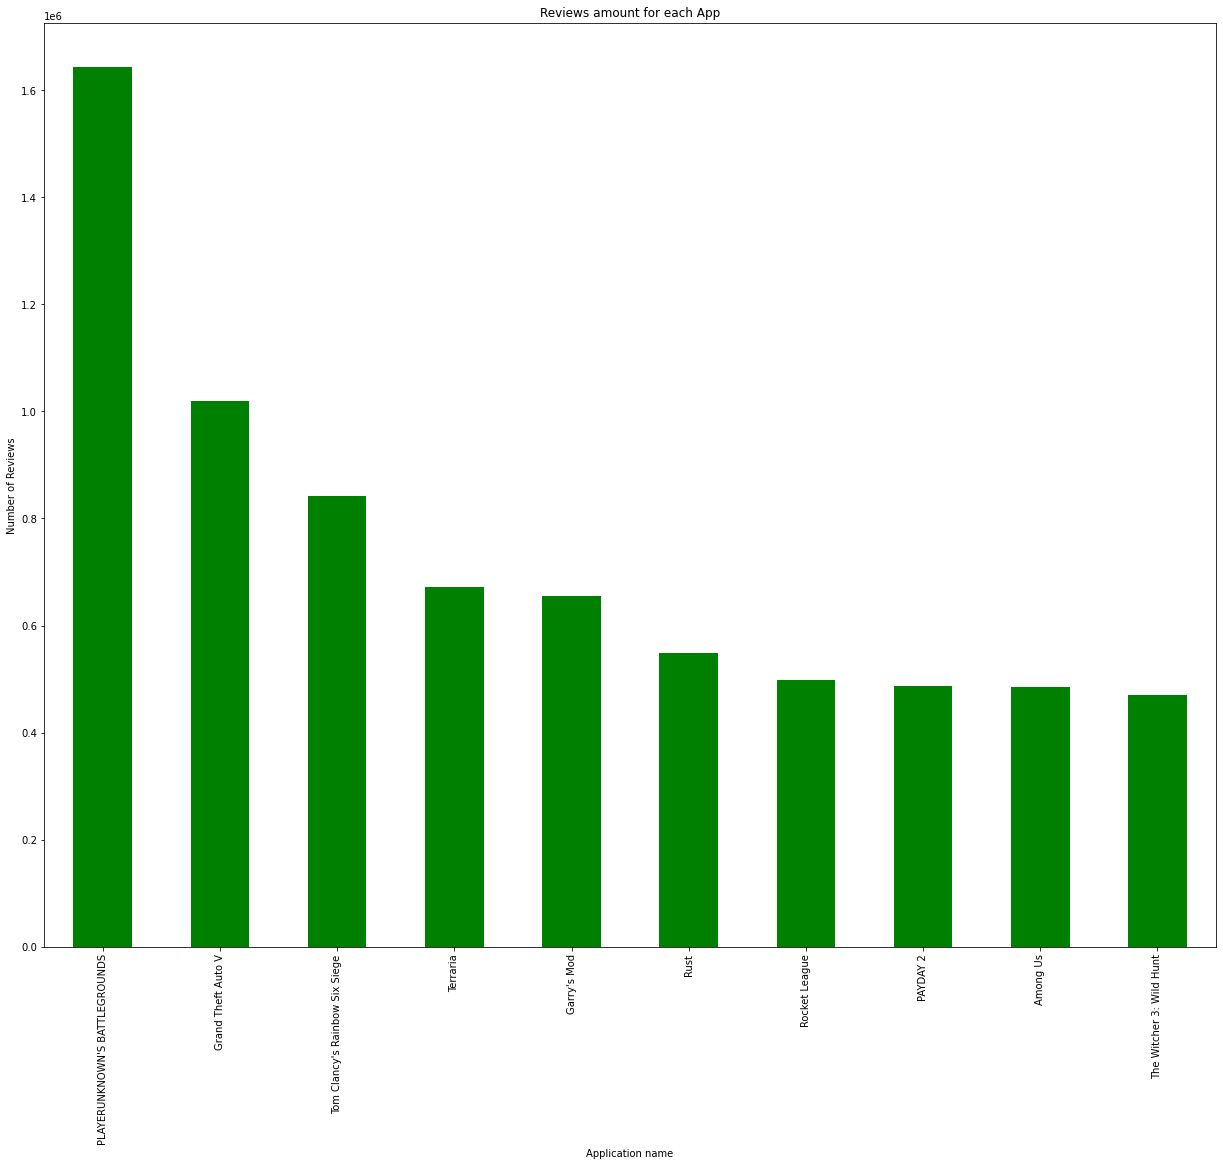

In [69]:
dataset['app_name'].value_counts()[:10].plot.bar(figsize = (21,17), title="Reviews amount for each App", 
                                                 xlabel = 'Application name', ylabel = 'Number of Reviews', color = 'green')

| **Game Name** | **Rank** |
|-------------------------------|-----|
| PLAYERUNKNOWN'S BATTLEGROUNDS | 1 |
| Greand Theft Auto V | 2 |
|Tom Clancy's Rainbow Six Siege | 3 |
|Terraria | 4 |
|Garry's Mod | 5 |
|Rust | 6 |
|Rocket Leaugue | 7 |
|PAYDAY 2 | 8 |
|Among Us | 9 |
|The Witcher 3: Wild Hunt|10|


Let's now see which application has the best *Weighted Vote Score* (WVS). Since every review has a different WVS we decided to do a *groupby* method to separate the dataset by the name of the application, and then find the mean value, for each game, of the WVS. With this method we found out that the game with the highest WVS was **Hunt Down The Freeman**

In [10]:
dataset.groupby('app_name')['weighted_vote_score'].mean().idxmax()

'Hunt Down The Freeman'

Let's now search for the most and the least recommended games on steam. To do this we decided to search for the games with the highest  and lowest percentage of reviews that recommended it. We chose this method because we didn't want to take into consideration the number of reviews a game has, since it is not a good indicator for the quality of a game. For example a game like *PLAYERUNKNOWN'S BATTLEGROUNDS* will have many recommendation but this is correlated to the huge number of reviews it has. In this way a game that has few reviews but almost all of them positive will be taken into consideration.
We achieved these results by doing a *groupby* method on the name of the game and calculating the *mean* on the *recommended* column:

In [11]:
dataset.groupby('app_name').recommended.mean().nlargest(5)

app_name
ULTRAKILL                        0.995344
Senren＊Banka                     0.994041
A Short Hike                     0.991449
The Henry Stickmin Collection    0.990258
Factorio                         0.989186
Name: recommended, dtype: float64

The top 5 recommended games on Steam are:

|**Rank**| **Game Name** |**Percentage of Recommendation**|
|---------|---------------------------|-----------|
| 1 | ULTRAKILL | 99.53 % |
| 2 | Senren * Banka | 99.40 % |
| 3 | A Short Hike | 99.14 % |
| 4 | The Henry Stickmin Collection | 99.03 %|
| 5 | Factorio | 98.92 % |


In [12]:
dataset.groupby('app_name').recommended.mean().nsmallest(5)

app_name
Identity                      0.243348
RollerCoaster Tycoon World    0.245098
SOS                           0.278406
Umbrella Corps                0.282236
NBA 2K18                      0.291965
Name: recommended, dtype: float64

The top 5 least recommended games on Steam are:

|**Rank**| **Game Name** |**Percentage of Recommendation**|
|---------|---------------------------|-----------|
| 315 | Identity | 24.33 % |
| 314 | RollerCoaster Tycoon World | 24.50 % |
| 313 | SOS | 27.84 % |
| 312 | Umbrella Corps | 28.22 %|
| 311 | NBA 2K18 | 29.20 % |


Let's now focus on the most recommended game and the least recommended game and check how many reviewers puchased these games or received them for free.

False    5480
True      104
Name: received_for_free, dtype: int64

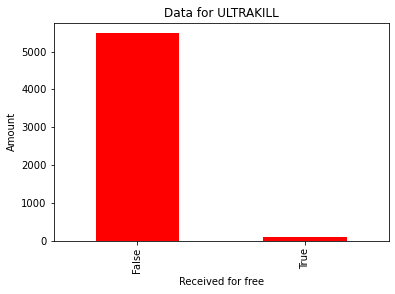

In [68]:
dataset[dataset['app_name']=="ULTRAKILL"]['received_for_free'].value_counts().plot.bar(color = 'red',xlabel = 'Received for free',
                                                                                                          ylabel = 'Amount',
                                                                                                          title = "Data for ULTRAKILL")
dataset[dataset['app_name']=="ULTRAKILL"]['received_for_free'].value_counts()

In the case of **ULTRAKILL** we can see that 5480 reviewers purchased the game, whether on Steam or on a 3rd party platform and 104 reviewers received it for free.

False    1764
True       40
Name: received_for_free, dtype: int64

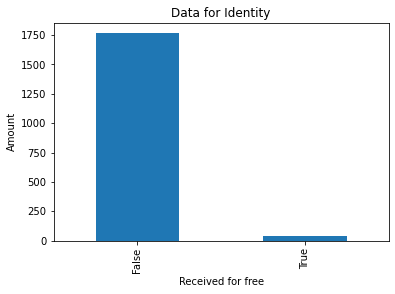

In [67]:
dataset[dataset['app_name']=="Identity"]['received_for_free'].value_counts().plot.bar(xlabel = 'Received for free',
                                                                                            ylabel = 'Amount',
                                                                                            title = "Data for Identity")
dataset[dataset['app_name']=="Identity"]['received_for_free'].value_counts()

In the case of **Identity** we can see that 1764 reviewers purchased the game, whether on Steam or on a 3rd party platform and 40 reviewers received it for free.

## [RQ3]Information about the time of the reviews

We are now interested in understanding the preferred time to do reviews.
Let's first see what is the most common time for the authors to write a review; to do this we took the *hour* and the minute *value* from the *timestamp_created* and then did a *plot bar* of the 15 most frequent entries. These are the results:

<AxesSubplot:xlabel='Time of Reviews', ylabel='Amount of Reviews'>

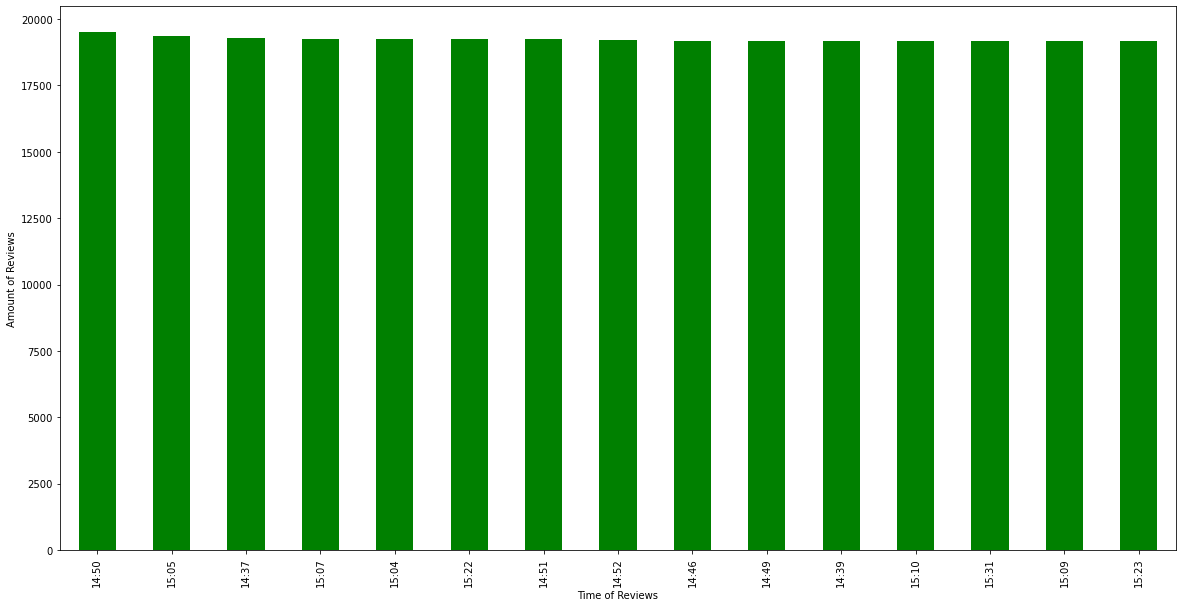

In [72]:
dataset['timestamp_created'].dt.strftime('%H:%M').value_counts()[:15].plot.bar(figsize = (20,10), color = 'green',
                                                                              xlabel = 'Time of Reviews',
                                                                              ylabel = 'Amount of Reviews')

The most common time is **14:50**, but as we can see, all the most common times are in the early afternoon. So let's analyze this thing better by checking time intervals instead of single minutes.
These are the time intervals we are going to check:

| **Initial Time** | **Final Time** |
|--------|--------|
|06:00:00|10:59:59|
|11:00:00|13:59:59|
|14:00:00|16:59:59|
|17:00:00|19:59:59|
|20:00:00|23:59:59|
|00:00:00|02:59:59|
|03:00:00|05:59:59|

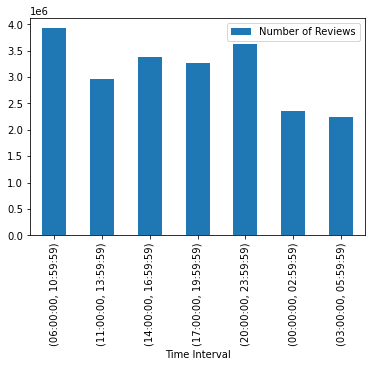

In [15]:
divide_and_plot(dataset, custom_time_intervals())

As we can see our hypothesis was false since most of the reviews are written from **6:00** to **11:00**

## [RQ4] Information about the languages

Let's now analyze the languages the reviews are written in.
First of all we checked the most frequent languages, doing a *value_counts* and then plotting it in a *bar plot*.
This is what we obtained:



<AxesSubplot:title={'center':'Data of languages'}, xlabel='Languages', ylabel='Amount of Reviews'>

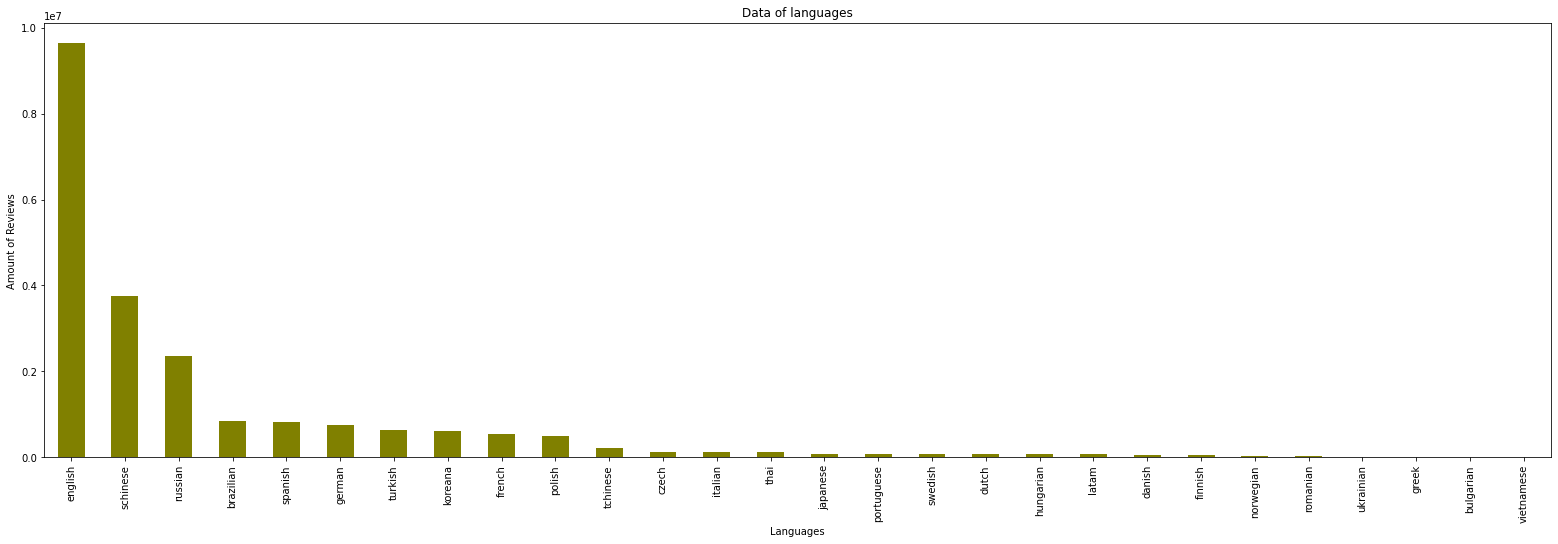

In [77]:
dataset['language'].value_counts().plot.bar(figsize = (27,8), title = 'Data of languages', color = 'olive',
                                            xlabel = 'Languages', 
                                            ylabel = 'Amount of Reviews')

We can see that the 3 most used languages are **english**, **semplified chinese** and **russian**. Let's now focus on the reviews written in these languages. We created a new dataset using our custom function *filter_by_language*, that takes as input the dataset and a list on languages in the form of a vector and returns the filtered dataset.

In [18]:
language_list = ['english', 'russian', 'schinese']
filt_ds = filter_by_language(dataset,language_list)

Let's now see how many of the reviews of this new dataset were voted as **funny** or **helpful**. To do this we used a custom function that counts how many reviews have at least one vote in each category and then calculate the percentage by simply doing a ratio between this found number and the total amount of the reviews.
For the percentage of **funny** votes this is what we obtained:

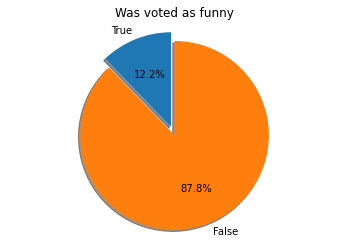

In [20]:
perc = funny_percentage(filt_ds)
plot_percentage(perc, 'Was voted as funny')

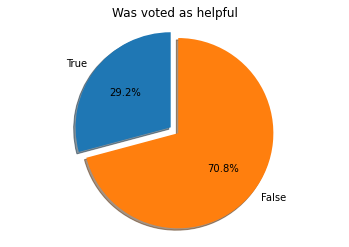

In [21]:
plot_percentage(helpful_percentage(filt_ds), 'Was voted as helpful')

## [RQ5] Information about the reviewers

Next up, we are going to get information about who write these reviews. First of all let's see who are the top 10 most popular
reviewers, where, for most popular, we intend the people who wrote more reviews.

<AxesSubplot:title={'center':'Most Popular Reviewers'}, xlabel='Author SteamId', ylabel='Amount of Written Reviews'>

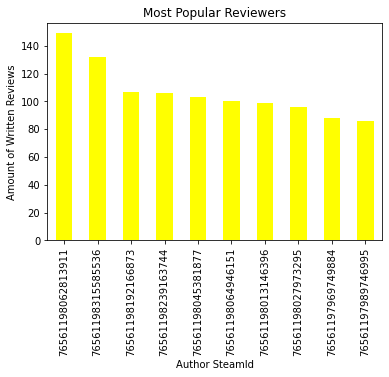

In [79]:
dataset['author.steamid'].value_counts()[:10].plot.bar(title = 'Most Popular Reviewers', color = 'yellow',
                                                      xlabel = 'Author SteamId',
                                                      ylabel = 'Amount of Written Reviews')

Here each reviewer is represented by the *SteamId*. This is a unique code which identifies the Steam profile and it cannot be changed once the account has been created. 
We are now going to focus on the most popular author and get some information about his profile. Let's start by getting his SteamId and taking the rows of the dataset which *steamid* entry corrispond to his:

In [23]:
dataset['author.steamid'].value_counts().idxmax()

76561198062813911

In [24]:
most_popular_reviewer = dataset[dataset['author.steamid'] == 76561198062813911]

Now that we got this new dataset, let's see which application did this person review:

In [27]:
print(list(most_popular_reviewer['app_name']))

['Half-Life', 'Counter-Strike: Source', 'Half-Life 2: Episode Two', 'Portal 2', "Garry's Mod", "Sid Meier's Civilization V", 'Dead by Daylight', "Sid Meier's Civilization VI", 'Subnautica', 'Human: Fall Flat', 'Banished', 'Celeste', 'Getting Over It with Bennett Foddy', 'A Hat in Time', 'The Forest', 'Axiom Verge', 'The Binding of Isaac: Rebirth', 'To the Moon', 'Cave Story+', 'Titan Souls', 'Super Meat Boy', "Don't Escape: 4 Days to Survive", 'Volgarr the Viking', 'Enter the Gungeon', 'Salt and Sanctuary', 'Hollow Knight', 'The End Is Nigh', 'Factorio', 'RimWorld', 'Insurgency: Sandstorm', 'Euro Truck Simulator 2', 'Foundation', 'Kenshi', 'Into the Breach', 'Warhammer: Vermintide 2', 'DOOM Eternal', 'Age of Empires: Definitive Edition', 'Void Bastards', 'Stardew Valley', 'Among Us', 'Blackwake', 'Little Nightmares', 'Bomber Crew', 'Rust', 'HITMAN™ 2', 'Phasmophobia', 'Mount & Blade: Warband', 'Resident Evil 2', 'Slime Rancher', 'Hotline Miami', 'Tomb Raider', 'BattleBlock Theater', 'D

We now want to check how many of these applications were purchased on steam and how many were received for free (It is important to notice that these two events are not complementary since a person can buy a game on a 3rd party platform so both entries can be *False*):

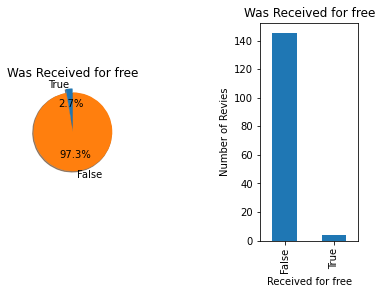

In [28]:
plot_and_count(most_popular_reviewer,received_for_free_percentage(most_popular_reviewer), 'received_for_free',
              my_title = 'Was Received for free', xlabel = 'Received for free')


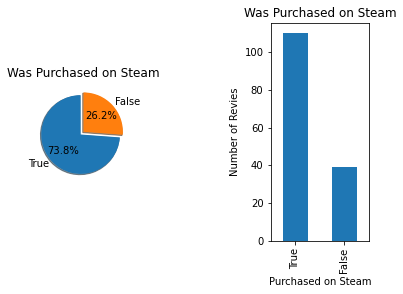

In [29]:
plot_and_count(most_popular_reviewer,steam_purchase_percentage(most_popular_reviewer), 'steam_purchase',
              my_title = 'Was Purchased on Steam', xlabel = 'Purchased on Steam')

Let's give a look, for each of these categories, how many games did he recommend. To see this, just like before, we filtered the dataset by focusing on the reviews that matched our demands, and did a simple *value_counts* to count the number of recommended games. These are the results:

In [30]:
most_popular_reviewer[most_popular_reviewer['steam_purchase'] == True].recommended.value_counts()

True     108
False      2
Name: recommended, dtype: int64

In [31]:
most_popular_reviewer[most_popular_reviewer['received_for_free'] == True].recommended.value_counts()

True    4
Name: recommended, dtype: int64

**Steam Purchased Games**

|Recommendend  |Amount|
|------------|--------|
|True | 108|
|False | 2 |

**Received for Free Games**

|Recommendend  |Amount|
|------------|--------|
|True | 4|
|False | 0 |

## [RQ6] Information about the updates

We now want to obtain information about authors who update their reviews. To do this we filtered the dataset with the rows which have different values in the **timestamp_created** and **timestamp_updated** columns (this means that the review was actually updated after some time). Then we want to calculate the average amount time an author lets pass before he updates his review. To do this we simply calculated the mean on a vector that contains the time difference between the **timestamp_created** and **timestamp_updated** columns of this new dataset.

In [32]:
dataset_with_updates = dataset[dataset['timestamp_updated'] != dataset['timestamp_created']]
(dataset_with_updates['timestamp_updated'] -dataset_with_updates['timestamp_created']).mean()

Timedelta('321 days 00:46:24.845186976')

We obtain that the average time is **321 days and 46 minutes**.
Another information we may want to have is to find the authors which updates their reviews more often. To do this we simply did a *value_counts* on the new dataset and plotted the first 3. Here are the results:

<AxesSubplot:title={'center':'Authors Which Updates Their Reviews'}, xlabel='Author SteamId', ylabel='Number of Updated Reviews'>

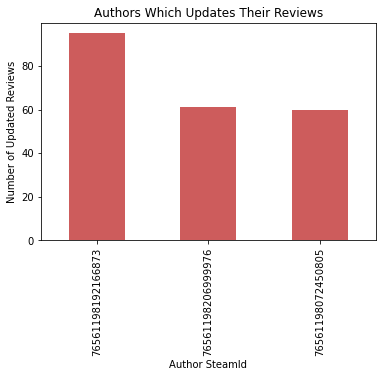

In [81]:
dataset_with_updates['author.steamid'].value_counts()[:3].plot.bar(title = 'Authors Which Updates Their Reviews', color = 'indianred',
                                                                  xlabel = 'Author SteamId',
                                                                  ylabel = 'Number of Updated Reviews')

## [RQ7] Calculating some probabilities

Let's calculate some interesting figures with our dataset.
First of all let's calculate the probability that a review has a **Weighted Vote Score** bigger than 0.5. To do this, given the amount of data we have, we can use the *Law of Big Numbers* and simply calculate the ratio between the reviews that have a *Weighted Vote Score* bigger than 0.5 and the total number of reviews. Here is the result:

In [34]:
print(weighted_vote_score_percentage(dataset))

0.21354034011743306


Now let's calculate the probability that a review has at least one vote as funny given that it has a *Weighted Vote Score* bigger than 0.5. To do this we filtered the dataset by only taking the rows that had a *Weighted Vote Score* bigger than 0.5 and use the *funny_percentage* custom function we used before on this new dataset. Here is the result:

In [35]:
print(funny_vote_given_score(dataset))

0.24978288914523247


We know want to know if the events:

**A** = {the review has at least one vote as funny}

**B** = {the review has a weighted vote score >= 0.5}

are independent.
To do this we used the definition of conditional probability and checked if 
P(**A** | **B**) = P(**A**)   by calculating the difference between the two values and look if it is close to zero.

In [36]:
print(funny_vote_given_score(dataset) - funny_percentage(dataset))

0.13008694980617397


As we can see their difference is not even close to zero so we can conclude that the two events are **not** independent.

## [RQ8] Statistical Tests and Analysis

We checked if there is a significant difference between some distribution of values in the dataset.
The first one we checked for was a difference in the Weighted Vote Score of reviews made in Chinese and the ones made in Russian.
First we took the rows of the dataset which language values were the ones we were interested in and separated the two. From these new two dataset we then took the *weighted_vote_score* and made it a *numpy* vector so that we could run some test on them. The test we chose is the **mannwhitneyu** which is a test for the null hypothesis that the two samples have the same distribution. These are the results:

In [37]:
russian_data = dataset[dataset['language'] == 'russian']
schinese_data= dataset[dataset['language'] == 'schinese']

In [38]:
vector_a = russian_data['weighted_vote_score'].to_numpy()
vector_b = schinese_data['weighted_vote_score'].to_numpy()

In [39]:
stat, p_value = mannwhitneyu(vector_a,vector_b)
print(f"The test resulted in a P-Value of {p_value}")

The test resulted in a P-Value of 0.0


As we can see the test approximated the resulting P-Value to zero, so we can reject the test hypotesis without almost any doubt. This means that the *Weighted Vote Score* of *Russian* and *Chinese* reviews have different distributions.

Then we checked if there was any correlation between the time a user lets pass before he updates his review and the Weighted Vote Score. To do this we took the reviews of the dataset which were updated (so the one were the *timestamp_created* and the *timestamp_updated* values were different) and then did a **pearsonr** test which checks for a linear correlation between two samples. Here are the results:

In [40]:
updated_dataset = dataset[dataset['timestamp_created'] != dataset['timestamp_updated']]

In [41]:
timedelta = (updated_dataset['timestamp_updated']-updated_dataset['timestamp_created']).apply(lambda x: x.value)
score = updated_dataset['weighted_vote_score']

In [42]:
correlation,p_value = pearsonr(timedelta,score)
print(f"The correlation value of the two samples is {correlation} with a P-Value of {p_value}")

The correlation value of the two samples is -0.03626372436285605 with a P-Value of 0.0


For this case we can see there is little to none correlation.

Lastly we checked if there is any difference in the results if we include the information of wether the game is recommended or not. We run the same **pearonr** test, this time separating the dataset in two sub-dataframe, one with the recommended games and the other with non-recommended games. These are the result:

In [43]:
updated_and_recom = updated_dataset[updated_dataset['recommended'] == True]
updated_and_not_recom = updated_dataset[updated_dataset['recommended'] == False]

recom_timedelta = (updated_and_recom['timestamp_updated']-updated_and_recom['timestamp_created']).apply(lambda x: x.value)
recom_score = updated_and_recom['weighted_vote_score']

not_recom_timedelta = (updated_and_not_recom['timestamp_updated']-updated_and_not_recom['timestamp_created']).apply(lambda x: x.value)
not_recom_score = updated_and_not_recom['weighted_vote_score']

In [44]:
correlation1,p_value1 = pearsonr(recom_timedelta,recom_score)
print(f"In the case of recommendend games,t he correlation value of the two samples is {correlation1}with a P-Value of {p_value1}")

In the case of recommendend games,t he correlation value of the two samples is -0.017765209247397284with a P-Value of 1.085724332241917e-135


In [45]:
correlation2,p_value2 = pearsonr(not_recom_timedelta,not_recom_score)
print(f"In the case of recommendend games,t he correlation value of the two samples is {correlation2}with a P-Value of {p_value2}")

In the case of recommendend games,t he correlation value of the two samples is -0.0961419760851828with a P-Value of 0.0


We can see that also in these case, there is very little correlation between the two values.

### Bonus Questions

#### What are histograms, bar plots, scatterplots and pie charts used for?

##### Histograms

Histograms are used to visualize **quantitative data** and their distribution. The data is divided in bins which can be of different length and for each bin we have a column that displays how many values are in that bin.
This is a histogram of the positive weighted vote scores of the dataset:

<function matplotlib.pyplot.show(close=None, block=None)>

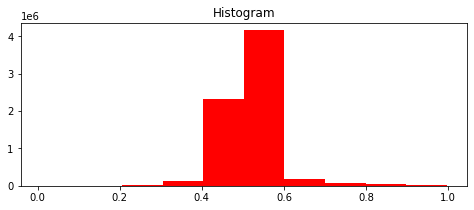

In [95]:
plt.figure(figsize = (8,3))
plt.title('Histogram')
plt.hist(dataset[dataset['weighted_vote_score'] != 0]['weighted_vote_score'], color = 'red')
plt.show

##### Bar Plots

Bar Plots are used to display **categorical data** grouping it in discrete groups. It is formed by rectangular bars which height is proportional to the number of elements that belong in that category. This is a bar plot of the languages used in the reviews:


<AxesSubplot:title={'center':'Bar Plot'}>

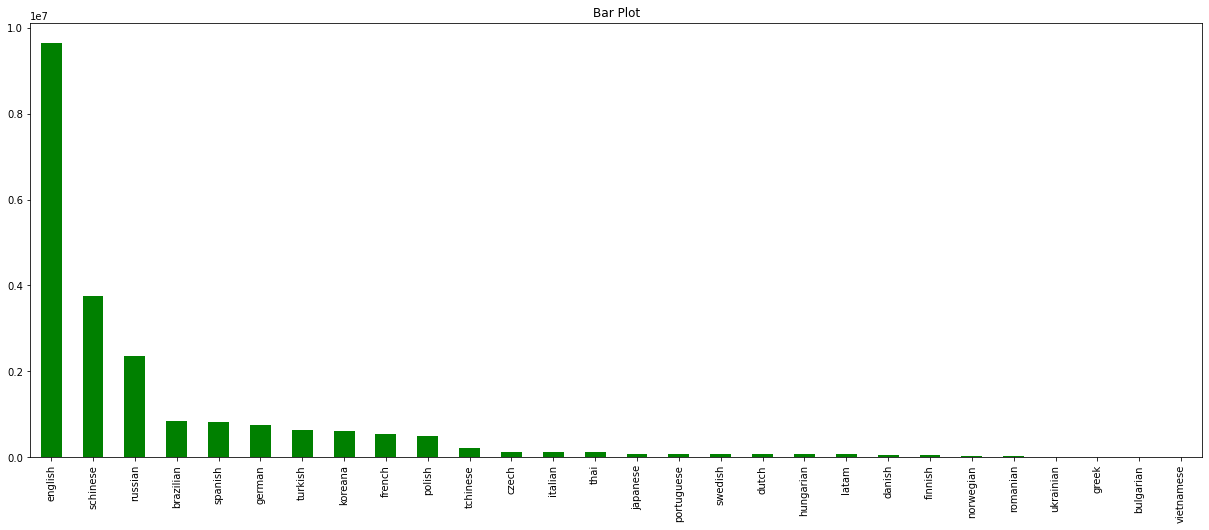

In [82]:
dataset['language'].value_counts().plot.bar(figsize = (21,8), color = 'green', title = 'Bar Plot')

##### Scatterplots

Scatterplots are mathematical diagram using **Cartesian coordinates** to display values for more than 1 variable. The data are displayed as a collection of points and each point has coordinates determined by its values in the variables taken in consideration. 
This is a scatterplot of the *votes_funny* and the *votes_helpful*:

<function matplotlib.pyplot.show(close=None, block=None)>

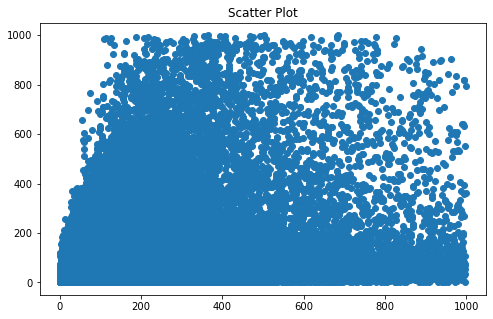

In [93]:
plt.figure(figsize = (8,5))
plt.title('Scatter Plot')
test_data = dataset[(dataset['votes_funny'] < 1000) & (dataset['votes_helpful'] <1000)]
plt.scatter(test_data['votes_helpful'], test_data['votes_funny'])
plt.show

##### Pie Charts

Pie Charts are circular graphics were each slice represent a **numerical proportion**. The arc-length of each slice is proportional to the quantity it represents. It is mostly used to represent **categorical data**. This is a pie chart of the reviews who were voted as funny:

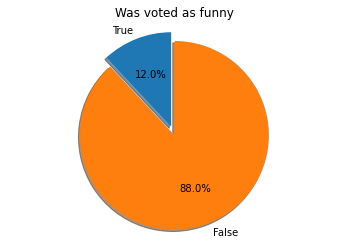

In [102]:
plot_percentage(funny_percentage(dataset), 'Was voted as funny')

#### What insights can you extract from a Box Plot?

Boxplots provides information about the variability of the value taken in consideration, his distribution, his median, upper and lower quartiles, minimum and maximum and also the outliers in the dataset. The boxplot is created using a number or ratio field on the y-axis.

## Theoretical Questions